In [2]:
# Import the modules
import numpy as np
import pandas as pd
from pathlib import Path

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, classification_report
from sklearn import svm
from sklearn.svm import SVC
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error, r2_score


import matplotlib.pyplot as plt


In [3]:
# Read the CSV file from the Resources folder into a Pandas DataFrame
file_path = Path("resources/original_csv.csv")
df = pd.read_csv(file_path)
# Review the DataFrame
df.head()

,Transaction Number,Transaction Date,Transaction Type,Transaction sub type,Registration type,Is Free Hold?,Usage,Area,Property Type,Property Sub Type,...,Property Size (sq.m),Room(s),Parking,Nearest Metro,Nearest Mall,Nearest Landmark,No. of Buyer,No. of Seller,Master Project,Project
0,102-1-2023,2023-01-02 07:25:49,Sales,Sell - Pre registration,Off-Plan,Free Hold,Residential,BUSINESS BAY,Unit,Flat,...,105.75,2 B/R,1,Business Bay Metro Station,Dubai Mall,Downtown Dubai,1,1,NaN,AYKON CITY 3
1,102-10-2023,2023-01-02 08:06:49,Sales,Sell - Pre registration,Off-Plan,Free Hold,Residential,BUSINESS BAY,Unit,Flat,...,52.29,Studio,1,Business Bay Metro Station,Dubai Mall,Downtown Dubai,1,1,NaN,AYKON CITY 3
2,102-100-2023,2023-01-02 09:01:22,Sales,Sell - Pre registration,Off-Plan,Free Hold,Residential,Al Wasl,Unit,Flat,...,161.32,2 B/R,1,NaN,NaN,NaN,1,1,NaN,Fern
3,102-1000-2023,2023-01-05 13:26:06,Sales,Sell - Pre registration,Off-Plan,Free Hold,Residential,JUMEIRAH LAKES TOWERS,Unit,Flat,...,99.64,2 B/R,1,Damac Properties,Marina Mall,Burj Al Arab,1,1,NaN,SEVEN CITY JLT
4,102-10000-2023,2023-03-01 16:02:19,Sales,Sell - Pre registration,Off-Plan,Free Hold,Residential,JUMEIRAH VILLAGE CIRCLE,Unit,Flat,...,63.95,1 B/R,1,Dubai Internet City,Marina Mall,Sports City Swimming Academy,1,1,NaN,Binghatti Corner


In [4]:
#remove Commercial properties from Usage column
df = df[df['Usage'] != 'Commercial']
df

,Transaction Number,Transaction Date,Transaction Type,Transaction sub type,Registration type,Is Free Hold?,Usage,Area,Property Type,Property Sub Type,...,Property Size (sq.m),Room(s),Parking,Nearest Metro,Nearest Mall,Nearest Landmark,No. of Buyer,No. of Seller,Master Project,Project
0,102-1-2023,2023-01-02 07:25:49,Sales,Sell - Pre registration,Off-Plan,Free Hold,Residential,BUSINESS BAY,Unit,Flat,...,105.75,2 B/R,1,Business Bay Metro Station,Dubai Mall,Downtown Dubai,1,1,NaN,AYKON CITY 3
1,102-10-2023,2023-01-02 08:06:49,Sales,Sell - Pre registration,Off-Plan,Free Hold,Residential,BUSINESS BAY,Unit,Flat,...,52.29,Studio,1,Business Bay Metro Station,Dubai Mall,Downtown Dubai,1,1,NaN,AYKON CITY 3
2,102-100-2023,2023-01-02 09:01:22,Sales,Sell - Pre registration,Off-Plan,Free Hold,Residential,Al Wasl,Unit,Flat,...,161.32,2 B/R,1,NaN,NaN,NaN,1,1,NaN,Fern
3,102-1000-2023,2023-01-05 13:26:06,Sales,Sell - Pre registration,Off-Plan,Free Hold,Residential,JUMEIRAH LAKES TOWERS,Unit,Flat,...,99.64,2 B/R,1,Damac Properties,Marina Mall,Burj Al Arab,1,1,NaN,SEVEN CITY JLT
4,102-10000-2023,2023-03-01 16:02:19,Sales,Sell - Pre registration,Off-Plan,Free Hold,Residential,JUMEIRAH VILLAGE CIRCLE,Unit,Flat,...,63.95,1 B/R,1,Dubai Internet City,Marina Mall,Sports City Swimming Academy,1,1,NaN,Binghatti Corner
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
81596,95-1-2023,2023-01-04 09:55:02,Sales,Delayed Development,Ready,Non Free Hold,Residential,SILICON OASIS,Unit,Flat,...,106.65,2 B/R,B1-71,NaN,NaN,IMG World Adventures,0,0,NaN,ARABIAN GATE
81597,95-2-2023,2023-01-09 09:48:42,Sales,Delayed Development,Ready,Non Free Hold,Residential,SILICON OASIS,Unit,Flat,...,127.92,2 B/R,B2-105,NaN,NaN,IMG World Adventures,0,0,NaN,ARABIAN GATE
81598,95-3-2023,2023-03-08 10:50:43,Sales,Delayed Development,Ready,Non Free Hold,Residential,SILICON OASIS,Unit,Flat,...,77.22,1 B/R,B1-55,NaN,NaN,IMG World Adventures,0,0,NaN,ARABIAN GATE
81599,95-4-2023,2023-05-01 11:40:33,Sales,Delayed Development,Ready,Non Free Hold,Residential,SILICON OASIS,Unit,Flat,...,85.84,1 B/R,G-61,NaN,NaN,IMG World Adventures,0,0,NaN,TOPAZ RESIDENCES 3


In [5]:
# Drop additional columns.
df = df.drop(columns=['Transaction Number', 'Transaction Date','Master Project','Project','Transaction sub type','Property Sub Type','Transaction Size (sq.m)','Parking','Nearest Metro','Nearest Mall', 'Nearest Landmark'])


In [6]:
# Drop 'land' subcategory, as we are only interested in actual buildings.
df = df[df["Property Type"] != "Land"]


In [7]:
# Drop null values.
df = df.dropna()
df

,Transaction Type,Registration type,Is Free Hold?,Usage,Area,Property Type,Amount,Property Size (sq.m),Room(s),No. of Buyer,No. of Seller
0,Sales,Off-Plan,Free Hold,Residential,BUSINESS BAY,Unit,2631000.0,105.75,2 B/R,1,1
1,Sales,Off-Plan,Free Hold,Residential,BUSINESS BAY,Unit,1466000.0,52.29,Studio,1,1
2,Sales,Off-Plan,Free Hold,Residential,Al Wasl,Unit,3309000.0,161.32,2 B/R,1,1
3,Sales,Off-Plan,Free Hold,Residential,JUMEIRAH LAKES TOWERS,Unit,1170137.0,99.64,2 B/R,1,1
4,Sales,Off-Plan,Free Hold,Residential,JUMEIRAH VILLAGE CIRCLE,Unit,590000.0,63.95,1 B/R,1,1
...,...,...,...,...,...,...,...,...,...,...,...
81596,Sales,Ready,Non Free Hold,Residential,SILICON OASIS,Unit,829878.0,106.65,2 B/R,0,0
81597,Sales,Ready,Non Free Hold,Residential,SILICON OASIS,Unit,907122.0,127.92,2 B/R,0,0
81598,Sales,Ready,Non Free Hold,Residential,SILICON OASIS,Unit,583109.0,77.22,1 B/R,0,0
81599,Sales,Ready,Non Free Hold,Residential,SILICON OASIS,Unit,600000.0,85.84,1 B/R,0,0


In [8]:
# Categorize features depending on their datatype.

obj = (df.dtypes == 'object')
object_cols = list(obj[obj].index)
print("Categorical variables:",len(object_cols))
 
int_ = (df.dtypes == 'int')
num_cols = list(int_[int_].index)
print("Integer variables:",len(num_cols))
 
fl = (df.dtypes == 'float')
fl_cols = list(fl[fl].index)
print("Float variables:",len(fl_cols))
df

Categorical variables: 7
Integer variables: 0
Float variables: 2


,Transaction Type,Registration type,Is Free Hold?,Usage,Area,Property Type,Amount,Property Size (sq.m),Room(s),No. of Buyer,No. of Seller
0,Sales,Off-Plan,Free Hold,Residential,BUSINESS BAY,Unit,2631000.0,105.75,2 B/R,1,1
1,Sales,Off-Plan,Free Hold,Residential,BUSINESS BAY,Unit,1466000.0,52.29,Studio,1,1
2,Sales,Off-Plan,Free Hold,Residential,Al Wasl,Unit,3309000.0,161.32,2 B/R,1,1
3,Sales,Off-Plan,Free Hold,Residential,JUMEIRAH LAKES TOWERS,Unit,1170137.0,99.64,2 B/R,1,1
4,Sales,Off-Plan,Free Hold,Residential,JUMEIRAH VILLAGE CIRCLE,Unit,590000.0,63.95,1 B/R,1,1
...,...,...,...,...,...,...,...,...,...,...,...
81596,Sales,Ready,Non Free Hold,Residential,SILICON OASIS,Unit,829878.0,106.65,2 B/R,0,0
81597,Sales,Ready,Non Free Hold,Residential,SILICON OASIS,Unit,907122.0,127.92,2 B/R,0,0
81598,Sales,Ready,Non Free Hold,Residential,SILICON OASIS,Unit,583109.0,77.22,1 B/R,0,0
81599,Sales,Ready,Non Free Hold,Residential,SILICON OASIS,Unit,600000.0,85.84,1 B/R,0,0


In [9]:
df.dtypes

Transaction Type         object
Registration type        object
Is Free Hold?            object
Usage                    object
Area                     object
Property Type            object
Amount                  float64
Property Size (sq.m)    float64
Room(s)                  object
No. of Buyer              int64
No. of Seller             int64
dtype: object

In [10]:
category_columns = ['Transaction Type', 'Is Free Hold?', 'Area', 'Property Type', 'Room(s)']

# Convert selected columns to categorical data type
df[category_columns] = df[category_columns].astype('category')

df.dtypes

Transaction Type        category
Registration type         object
Is Free Hold?           category
Usage                     object
Area                    category
Property Type           category
Amount                   float64
Property Size (sq.m)     float64
Room(s)                 category
No. of Buyer               int64
No. of Seller              int64
dtype: object

In [11]:
# Encode variables.
df = pd.get_dummies(df)
df

,Amount,Property Size (sq.m),No. of Buyer,No. of Seller,Transaction Type_Gifts,Transaction Type_Mortgage,Transaction Type_Sales,Registration type_Off-Plan,Registration type_Ready,Is Free Hold?_Free Hold,...,Room(s)_6 B/R,Room(s)_7 B/R,Room(s)_9 B/R,Room(s)_GYM,Room(s)_Hotel,Room(s)_Office,Room(s)_PENTHOUSE,Room(s)_Shop,Room(s)_Single Room,Room(s)_Studio
0,2631000.0,105.75,1,1,0,0,1,1,0,1,...,0,0,0,0,0,0,0,0,0,0
1,1466000.0,52.29,1,1,0,0,1,1,0,1,...,0,0,0,0,0,0,0,0,0,1
2,3309000.0,161.32,1,1,0,0,1,1,0,1,...,0,0,0,0,0,0,0,0,0,0
3,1170137.0,99.64,1,1,0,0,1,1,0,1,...,0,0,0,0,0,0,0,0,0,0
4,590000.0,63.95,1,1,0,0,1,1,0,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
81596,829878.0,106.65,0,0,0,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0
81597,907122.0,127.92,0,0,0,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0
81598,583109.0,77.22,0,0,0,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0
81599,600000.0,85.84,0,0,0,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [12]:
# Split our preprocessed data into our features and target arrays. y should be target, and X should be features.
# The X variable should include all features except the target

X = df.drop('Amount', axis=1)
y = df['Amount']


In [13]:
# Split the data into testing and training datasets.
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [14]:
# Use standardscaler to standardizze the features.
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [21]:
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error
# Create the SVR model.

svr_model = SVR(kernel='rbf', C=1.0, epsilon=0.1)

# Train the model on the scaled training data
svr_model.fit(X_train_scaled, y_train.ravel())

SVR()

In [25]:
# Make predictions on the scaled test data
from sklearn.metrics import mean_squared_error, r2_score

y_pred = svr_model.predict(X_test_scaled)

# Calculate the Mean Squared Error (MSE) as a measure of model performance
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
std = np.std(y)
# Display the computed metrics
print("R-squared Score:", r2)
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("Standard Deviation (std) of the target variable:", std)

R-squared Score: -0.020823925919561503
Mean Squared Error (MSE): 22530063438803.17
Root Mean Squared Error (RMSE): 4746584.397101054
Standard Deviation (std) of the target variable: 3877049.4452552227


In [ ]:
# First attempt: (kernel='rbf', C=1.0, epsilon=0.1), took 4 minutes and 18 seconds.
#R-squared Score: -0.020823925919561503
#Mean Squared Error (MSE): 22530063438803.17
#Root Mean Squared Error (RMSE): 4746584.397101054
#Standard Deviation (std) of the target variable: 3877049.4452552227

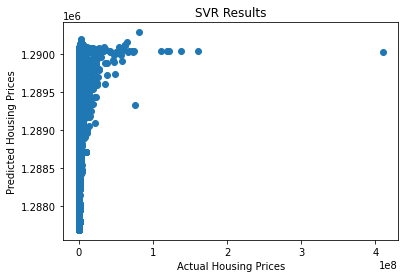

In [26]:
plt.scatter(y_test, y_pred)
plt.xlabel('Actual Housing Prices')
plt.ylabel('Predicted Housing Prices')
plt.title('SVR Results')
plt.show()